# Entropy analysis for Price and Prejudice by Jane Austen
***

## Code for the problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
files = os.listdir('books')

## Functions to compute letters and words

In [2]:
def readlett(file):
  clst=[]
  needed = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
  f = open(file,'r')
  for line in f:
    for c in line:
      if c in needed:
        clst.append(c.lower())
  return clst

In [3]:
def readword(file):
  wlst=[]
  f = open(file,'r')
  for line in f:
    for w in line.split():
      wlst.append(w.lower())
  return wlst

## Letters entropy

### Novel

In [13]:
allcb = readlett('/content/book.txt')
characterb, countb=np.unique(allcb,return_counts = True)
pcb = countb/len(allcb)
cSb = -np.sum(pcb * np.log2(pcb))
cSbmax = -np.log2((1/len(characterb)))
print(f'Total letters: {len(allcb)}\n Uniques: {len(characterb)}\n Entropy: {np.around(cSb,5)}\n Max.entropy: {np.around(cSbmax,5)}')

Total letters: 552345
 Uniques: 26
 Entropy: 4.18301
 Max.entropy: 4.70044


### Top 24 bookd from Project Gutenberg

In [14]:
allcd = readlett('/content/24.txt')
characterd, countd=np.unique(allcd,return_counts = True)
pcd = countd/len(allcd)
cSd = -np.sum(pcd * np.log2(pcd))
cSdmax = -np.log2((1/len(characterd)))
print(f'Total letters: {len(allcd)}\n Uniques: {len(characterd)}\n Entropy: {np.around(cSd,5)}\n Max. entropy: {np.around(cSdmax,5)}')

Total letters: 9568572
 Uniques: 26
 Entropy: 4.18322
 Max. entropy: 4.70044


### Comparison

In [15]:
#borrowed from stackoverflow.com
def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    fig,ax=plt.subplots(figsize=(25,7))
    leg = ['book','dictionary']
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge",label=leg[i])   
    plt.xlabel('character')
    plt.ylabel('probability')
    plt.xticks(_X, X)
    plt.legend()

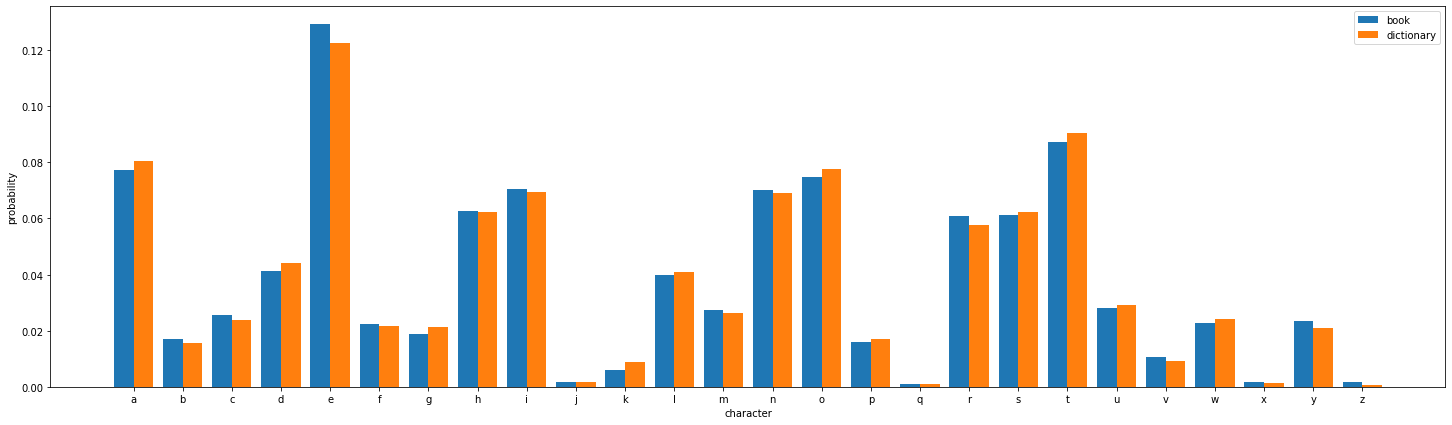

In [16]:
subcategorybar(characterb, [countb/len(allcb),countd/len(allcd)])

## Words entropy

### Novel

In [17]:
allw = readword('/content/book.txt')
word, wcount = np.unique(allw, return_counts = True)
pw = wcount/len(allw)
wS = -np.sum(pw * np.log2(pw))
wSmax = -np.log2((1/len(word)))
print(f'Total words: {len(allw)}\n Uniques: {len(wcount)}\n Entropy: {np.around(wS,5)}\n Max. entropy: {np.around(wSmax,5)}')

Total words: 124749
 Uniques: 13132
 Entropy: 9.82878
 Max. entropy: 13.6808


### Top 24 books from Project Gutenberg

In [19]:
allw = readword('/content/24.txt')
word, wcount = np.unique(allw, return_counts = True)
pw = wcount/len(allw)
wS = -np.sum(pw * np.log2(pw))
wSmax = -np.log2((1/len(word)))
print(f'Total words: {len(allw)}\n Uniques: {len(wcount)}\n Entropy: {np.around(wS,5)}\n Max. entropy: {np.around(wSmax,5)}')

Total words: 2220351
 Uniques: 134827
 Entropy: 10.9599
 Max. entropy: 17.04075


## Discussion

I found the word and letter entropies for the novel pride and prejudice and compared it with top 24 books from Project Gutenberg. The results are summarized in the tables below.

For letters:

|   | Total letters  |  Uniques |  Entropy |   Max.entropy |
|---|---|---|---|---|
|  Novel | 552345  | 26  | 4.18301  |  4.70044 |
|  24 books |  9568572 |  26 | 4.18322  |  4.70044 |

The plot below also shows the letter by letter comparison of the probabilites. I think, if we add more and more books the numbers will get closer and closer.

For words:

|   | Total words  |  Uniques |  Entropy |   Max.entropy |
|---|---|---|---|---|
|  Novel | 124749  | 13132  | 9.82878  |  13.6808 |
|  24 books |  2220351 |  134827 | 10.9599  |  17.04075 |


In these tables, the maximum entropies are computed by assuming that each letter and word in the novel or collection of novels are equally likely i.e. complete ignorance. The decrease in entropies in the case of novel shows that the novel is not following a uniform distribution (neither for words not for letters).

For the case of letters, combined entropy of a collection of 24 books, we can see that the maximum entropy is same as that of the novel. The reason for this is the number of unique alphabets, 26, which are the same, no matter how large a collection we take. Thus the probability for each letter is 1/26.

For the case of words, we can see the uniques words are different in the novel and collection of books. Thus, for maximum entropy, we assign each word in the novel a probability of 1/13132, while for the collection, each word has probability of 1/134827. This makes the later case more uncertain then the former and so the entropy for the collection is larger than the novel.

As i understood it, let's say that each word of the novel is made of random bunch of letters making no sense when combined together e.g. ywyshajwnshhs. Such words combine to make a sentences and those sentences together form the book. In this case if we know a letters of a word we can't predict what will be the next letter to complete the word. As an example, take the word, Appl_ we know that the most probable letter Will be "e" to complete the word, while in the case of aghigkiehhshbs__, who knows what's the last letter to complete the word and so the probability of each letter is 1/26.
Similarly for a sentence say, " The distance is nothing when one has motive.” if I remove the word "nothing" we can make gusses to fill the void. But if our sentances doesn't make any sence like this one "aeghb kadabra expectra petronan" . One can't guess the missing word ,if any, and thus all the words are equally probable.

***